In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Load the data

In [96]:
df=pd.read_csv("/content/Customer-Churn.csv")

In [97]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


First of all, drop customerID column as it is of no use

In [99]:
df.drop('customerID',axis='columns',inplace=True)

In [100]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
df.shape

(7043, 20)

some values seems to be not numbers but blank string

In [102]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [103]:
df["TotalCharges"].dtype

dtype('float64')

In [104]:
df["TotalCharges"].isnull().sum()

11

In [105]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [106]:
df["TotalCharges"].isnull().sum()

0

Data Visualization

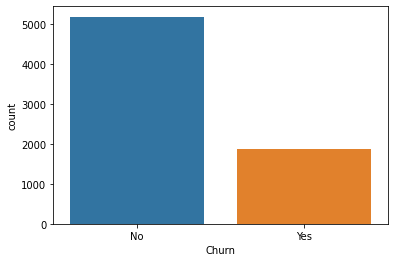

In [107]:
sns.countplot(df["Churn"])
plt.show()

Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [108]:
def unique(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}: {df[column].unique()}') 

In [109]:
unique(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [110]:
df["MultipleLines"].replace('No phone service',"No",inplace=True)


In [111]:
df["OnlineSecurity"].replace('No internet service',"No",inplace=True)
df["DeviceProtection"].replace('No internet service',"No",inplace=True)
df["TechSupport"].replace('No internet service',"No",inplace=True)
df["StreamingTV"].replace('No internet service',"No",inplace=True)
df["StreamingMovies"].replace('No internet service',"No",inplace=True)
df["OnlineBackup"].replace('No internet service',"No",inplace=True)

In [112]:
unique(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Convert Yes and No to 1 or 0

In [113]:
df.replace({"Yes":1,"No":0},inplace=True)

In [114]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [116]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

One hot encoding for categorical columns

In [117]:
df=pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [118]:
col= ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col] = scaler.fit_transform(df[col])

In [119]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [120]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

Train test split

In [121]:
from sklearn.model_selection import train_test_split 

In [122]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [123]:
x_train.shape

(5634, 26)

In [124]:
x_test.shape

(1409, 26)

Build a model (ANN) in tensorflow/keras

In [125]:
import tensorflow as tf

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,PReLU,ELU,ReLU,Dropout

In [127]:
classifier=Sequential()

In [128]:
classifier.add(Dense(units=26,activation="relu"))

In [129]:
classifier.add(Dense(units=22,activation="relu"))

In [130]:
classifier.add(Dense(1,activation='sigmoid'))

In [131]:
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [132]:
classifier.compile(optimizer="Adam",loss="BinaryCrossentropy",metrics=["accuracy"])

In [133]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=100,epochs=150,callbacks=early_stopping)

Epoch 1/150
38/38 [==============================] - 1s 8ms/step - loss: 0.6140 - accuracy: 0.6582 - val_loss: 0.5451 - val_accuracy: 0.7323
Epoch 2/150
38/38 [==============================] - 0s 4ms/step - loss: 0.5093 - accuracy: 0.7477 - val_loss: 0.4707 - val_accuracy: 0.7817
Epoch 3/150
38/38 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.7742 - val_loss: 0.4474 - val_accuracy: 0.7930
Epoch 4/150
38/38 [==============================] - 0s 5ms/step - loss: 0.4408 - accuracy: 0.7864 - val_loss: 0.4411 - val_accuracy: 0.7887
Epoch 5/150
38/38 [==============================] - 0s 4ms/step - loss: 0.4321 - accuracy: 0.7888 - val_loss: 0.4391 - val_accuracy: 0.7892
Epoch 6/150
38/38 [==============================] - 0s 5ms/step - loss: 0.4280 - accuracy: 0.7893 - val_loss: 0.4389 - val_accuracy: 0.7978
Epoch 7/150
38/38 [==============================] - 0s 5ms/step - loss: 0.4237 - accuracy: 0.7976 - val_loss: 0.4391 - val_accuracy: 0.7903
Epoch 8/150
3

In [134]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


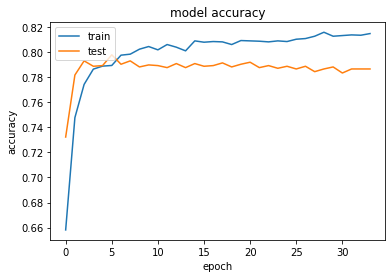

In [135]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

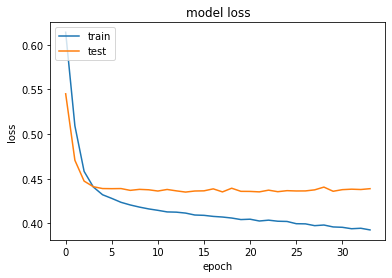

In [136]:

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [137]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

45/45 [==============================] - 0s 1ms/step


Accuracy

In [138]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cr=classification_report(y_test,y_pred)
cm

array([[920, 141],
       [145, 203]])

classification_report

In [139]:
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1061
           1       0.59      0.58      0.59       348

    accuracy                           0.80      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [140]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [142]:

score

0.7970191625266146